In [1]:
import os
import zipfile
import fnmatch
import pandas as pd
import dotenv
from multiprocessing import Pool, cpu_count
from functools import partial

dotenv.load_dotenv()

False

### Load Raw Data

In [ ]:
# DATA_FOLDER=os.getenv("DATA_FOLDER")

In [ ]:
# def extract_prefix_from_name(inner_name):
#     marker = "_FLUXNET_FULLSET_DD_"
#     idx = inner_name.find(marker)
#     if idx >= 0:
#         return inner_name[:idx]
#     else:
#         return None

# def process_zip_file_single(zip_path, desired_cols, default_missing=-9999):
#     dfs = []
#     try:
#         with zipfile.ZipFile(zip_path, 'r') as z:
#             for inner_name in z.namelist():
#                 if fnmatch.fnmatch(inner_name, "*_FLUXNET_FULLSET_DD_*.csv"):
#                     prefix = extract_prefix_from_name(inner_name)
#                     if prefix is None:
#                         print(f"[هشدار] نام فایل مطابق الگو نیست: {inner_name}")
#                         continue

#                     with z.open(inner_name) as f:
#                         try:
#                             df = pd.read_csv(f)
#                         except Exception as e:
#                             print(f"[خطا] خواندن {inner_name} در {zip_path}: {e}")
#                             continue

#                         missing = [c for c in desired_cols if c not in df.columns]
#                         present = [c for c in desired_cols if c in df.columns]

#                         if len(present) == 0:
#                             print(f"[رد] در {inner_name} هیچ ستونی از {desired_cols} پیدا نشد — رد میشه.")
#                             continue

#                         df2 = df[present].copy()

#                         for col in missing:
#                             df2[col] = default_missing

#                         df2 = df2[desired_cols]
#                         df2["prefix"] = prefix

#                         dfs.append(df2)
                        
#     except zipfile.BadZipFile as e:
#         print(f"[خطا] فایل ZIP خراب: {zip_path}: {e}")
#     except Exception as e:
#         print(f"[خطا کلی] در {zip_path}: {e}")

#     if dfs:
#         combined = pd.concat(dfs, ignore_index=True)
#         return combined
#     else:
#         return None


# def init_worker():
#     pass

# def process_all_zips(zip_folder, desired_cols, output_path, chunksize=5):
#     if not os.path.exists(zip_folder):
#         raise FileNotFoundError(f"مسیر وجود ندارد: {zip_folder}")

#     zip_paths = [os.path.join(zip_folder, f) for f in os.listdir(zip_folder)
#                  if f.lower().endswith(".zip")]
#     if not zip_paths:
#         print("هیچ فایل زیپی یافت نشد.")
#         return

#     nproc = max(1, cpu_count() - 1)
#     print(f"شروع با {nproc} پردازشگر …")

#     first_write = True
#     with Pool(processes=nproc, initializer=init_worker) as pool:
#         func = partial(process_zip_file_single, desired_cols=desired_cols)
#         for result in pool.imap(func, zip_paths, chunksize=chunksize):
#             if result is None:
#                 continue
#             if first_write:
#                 result.to_csv(output_path, mode="w", header=True, index=False)
#                 first_write = False
#             else:
#                 result.to_csv(output_path, mode="a", header=False, index=False)
#             print(f"ذخیره بخشی به {output_path} — سطرها: {len(result)}")

#     print("پایان پردازش همه فایل‌ها.")


# if __name__ == "__main__":
#     zip_folder = DATA_FOLDER
#     output_path = "../output/results.csv"
#     desired_cols = [
#         "TIMESTAMP",
#         "TA_F",
#         "NETRAD",
#         "G_F_MDS",
#         "LE_F_MDS",
#         "LE_CORR",
#         "H_F_MDS",
#         "H_CORR",
#     ]
#     process_all_zips(zip_folder, desired_cols, output_path)

### Calculate ET

In [2]:
df = pd.read_csv("../output/results.csv", na_values=-9999)
df

,TIMESTAMP,TA_F,NETRAD,G_F_MDS,LE_F_MDS,LE_CORR,H_F_MDS,H_CORR,prefix
0,20120101,22.670,NaN,NaN,82.8132,NaN,80.3183,NaN,AMF_AR-Bal
1,20120102,19.954,NaN,NaN,81.0360,NaN,83.2394,NaN,AMF_AR-Bal
2,20120103,17.873,NaN,NaN,82.9454,NaN,81.2318,NaN,AMF_AR-Bal
3,20120104,21.619,NaN,NaN,82.8132,NaN,80.3183,NaN,AMF_AR-Bal
4,20120105,26.833,NaN,NaN,81.0360,NaN,83.2394,NaN,AMF_AR-Bal
...,...,...,...,...,...,...,...,...,...
781299,20241227,-17.310,NaN,NaN,37.9890,33.8979,17.6365,13.6021,AMF_US-YK2
781300,20241228,-19.508,NaN,NaN,41.6048,33.1478,20.3458,14.9406,AMF_US-YK2
781301,20241229,-13.908,NaN,NaN,55.0682,41.7156,32.2639,23.1845,AMF_US-YK2
781302,20241230,-5.898,NaN,NaN,37.9890,28.2504,17.6365,12.2569,AMF_US-YK2


In [3]:
df["ET"] = (df["LE_F_MDS"] * 86400) / (2501 * 1000 - (2361 * df["TA_F"]))
df["ET_CORR"] = (df["LE_CORR"] * 86400) / (2501 * 1000 - (2361 * df["TA_F"]))
df

,TIMESTAMP,TA_F,NETRAD,G_F_MDS,LE_F_MDS,LE_CORR,H_F_MDS,H_CORR,prefix,ET,ET_CORR
0,20120101,22.670,NaN,NaN,82.8132,NaN,80.3183,NaN,AMF_AR-Bal,2.923444,NaN
1,20120102,19.954,NaN,NaN,81.0360,NaN,83.2394,NaN,AMF_AR-Bal,2.853231,NaN
2,20120103,17.873,NaN,NaN,82.9454,NaN,81.2318,NaN,AMF_AR-Bal,2.914624,NaN
3,20120104,21.619,NaN,NaN,82.8132,NaN,80.3183,NaN,AMF_AR-Bal,2.920483,NaN
4,20120105,26.833,NaN,NaN,81.0360,NaN,83.2394,NaN,AMF_AR-Bal,2.872241,NaN
...,...,...,...,...,...,...,...,...,...,...,...
781299,20241227,-17.310,NaN,NaN,37.9890,33.8979,17.6365,13.6021,AMF_US-YK2,1.291274,1.152215
781300,20241228,-19.508,NaN,NaN,41.6048,33.1478,20.3458,14.9406,AMF_US-YK2,1.411297,1.124423
781301,20241229,-13.908,NaN,NaN,55.0682,41.7156,32.2639,23.1845,AMF_US-YK2,1.877742,1.422439
781302,20241230,-5.898,NaN,NaN,37.9890,28.2504,17.6365,12.2569,AMF_US-YK2,1.305108,0.970540


In [4]:
df.rename(
    columns={
        "TIMESTAMP": "Date",
        "TA_F": "Ta",
        "LE_F_MDS": "LE",
        "prefix": "StationID",
    },
    inplace=True
)

data = df[["StationID", "Date", "Ta", "LE", "LE_CORR", "ET", "ET_CORR"]].copy()

data['StationID'] = data['StationID'].astype('category')
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')
data['Ta'] = pd.to_numeric(data['Ta'], errors='coerce')
data['ET'] = pd.to_numeric(data['ET'], errors='coerce')
data['ET_CORR'] = pd.to_numeric(data['ET_CORR'], errors='coerce')
# round data 2 dig
data = data.round(2)

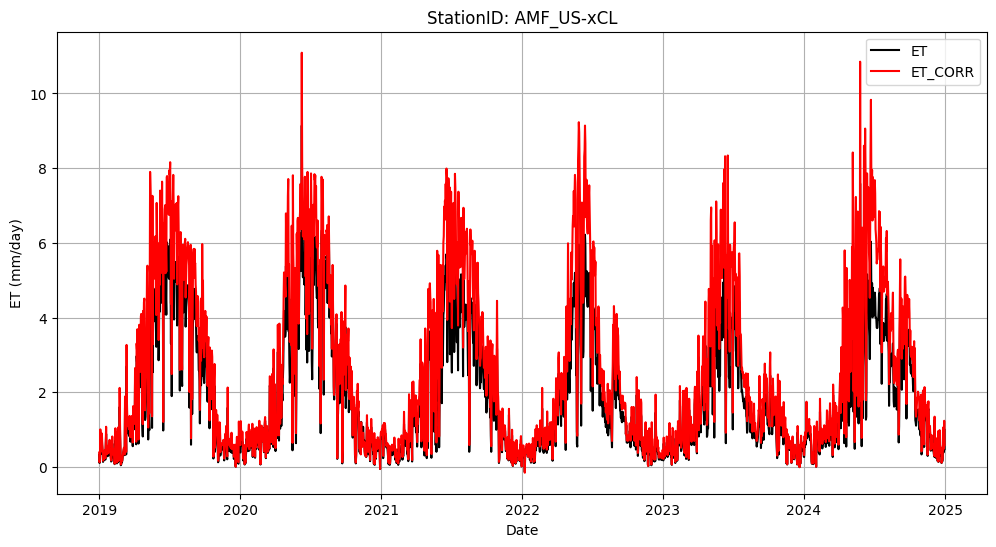

In [84]:
# selecet random StationID and plot ET and ET_Corr
import matplotlib.pyplot as plt
import numpy as np
import random
random_station = random.choice(data['StationID'].cat.categories)
station_data = data[data['StationID'] == random_station].sort_values(by='Date')
plt.figure(figsize=(12, 6))
plt.plot(station_data['Date'], station_data['ET'], label='ET', color='black', alpha=1)
plt.plot(station_data['Date'], station_data['ET_CORR'], label='ET_CORR', color='red', alpha=1)
plt.xlabel('Date')
plt.ylabel('ET (mm/day)')
plt.title(f'StationID: {random_station}')
plt.legend()
plt.grid()
plt.show()


In [69]:
station_data

,StationID,Date,Ta,LE,LE_CORR,ET,ET_CORR
41276,AMF_CA-EM1,2021-01-01,-12.11,104.00,NaN,3.55,NaN
41277,AMF_CA-EM1,2021-01-02,-5.49,73.82,NaN,2.54,NaN
41278,AMF_CA-EM1,2021-01-03,-2.11,74.51,NaN,2.57,NaN
41279,AMF_CA-EM1,2021-01-04,-4.46,104.00,NaN,3.58,NaN
41280,AMF_CA-EM1,2021-01-05,-8.72,73.82,NaN,2.53,NaN
...,...,...,...,...,...,...,...
42366,AMF_CA-EM1,2023-12-27,-2.93,1.54,NaN,0.05,NaN
42367,AMF_CA-EM1,2023-12-28,-4.46,-1.14,NaN,-0.04,NaN
42368,AMF_CA-EM1,2023-12-29,-5.66,-0.11,NaN,-0.00,NaN
42369,AMF_CA-EM1,2023-12-30,-7.51,-0.08,NaN,-0.00,NaN
